# **TP Supervised Learning Review**

In [0]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import time, random 

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier as KNNs
from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, zero_one_loss


## **0. Load dataset**

### Load MNIST dataset

In [0]:
# import data
mnist = fetch_openml('mnist_784')

In [4]:
images = mnist.data.reshape((-1,28,28))
data = mnist.data
target = mnist.target
print("Shape of training images : ", images.shape)
print("Shape of training data : ", data.shape)
print("Shape of target : ", target.shape)

Shape of training images :  (70000, 28, 28)
Shape of training data :  (70000, 784)
Shape of target :  (70000,)


In [5]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Split training & test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data,target,train_size =0.8)

X_train, y_train = X_train[:500], y_train[:500]
X_test, y_test = X_test[:500], y_test[:500]

print("Traning data shape : ", X_train.shape)
print("Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing target shape : ", y_test.shape)

Traning data shape :  (500, 784)
Traning target shape :  (500,)
Testing data shape :  (500, 784)
Testing target shape :  (500,)


## **1. Train with : KNN, MLP, SVM  and  Comparison**

In [0]:
train_scores = []
test_scores = []
train_losses = []
test_losses = []
training_times = []

In [20]:
%%time
knn = KNNs(n_neighbors=3,p=3)
start = time.clock()
knn.fit(X_train,y_train)
exec_time = time.clock() - start
train_scores.append(knn.score(X_train,y_train))
test_scores.append(knn.score(X_test,y_test))
train_losses.append(zero_one_loss(y_train,knn.predict(X_train)))
test_losses.append(zero_one_loss(y_test,knn.predict(X_test)))
training_times.append(exec_time)
print("Training accuracy : ",knn.score(X_train,y_train))
print("Test accuracy : ",knn.score(X_test,y_test))

Training accuracy :  0.914
Test accuracy :  0.86
CPU times: user 31.6 s, sys: 6.07 ms, total: 31.6 s
Wall time: 31.6 s


In [21]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50),solver='adam',activation='relu',verbose=0)
start = time.clock()
mlp.fit(X_train,y_train)
exec_time = time.clock() - start
train_scores.append(mlp.score(X_train, y_train))
test_scores.append(mlp.score(X_test,y_test))
train_losses.append(zero_one_loss(y_train,mlp.predict(X_train)))
test_losses.append(zero_one_loss(y_test,mlp.predict(X_test)))
training_times.append(exec_time)
print("Training accuracy : ",mlp.score(X_train,y_train))
print("Test accuracy : ",mlp.score(X_test,y_test))

Training accuracy :  1.0
Test accuracy :  0.616
CPU times: user 1.18 s, sys: 551 ms, total: 1.74 s
Wall time: 902 ms


In [22]:
%%time
svc = SVC()
start = time.clock()
svc.fit(X_train,y_train)
exec_time = time.clock() - start
train_scores.append(svc.score(X_train,y_train))
test_scores.append(svc.score(X_test,y_test))
train_losses.append(zero_one_loss(y_train,svc.predict(X_train)))
test_losses.append(zero_one_loss(y_test,svc.predict(X_test)))
training_times.append(exec_time)
print("Training accuracy : ",svc.score(X_train,y_train))
print("Test accuracy : ",svc.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training accuracy :  1.0
Test accuracy :  0.106
CPU times: user 2.03 s, sys: 76.9 ms, total: 2.11 s
Wall time: 2.04 s


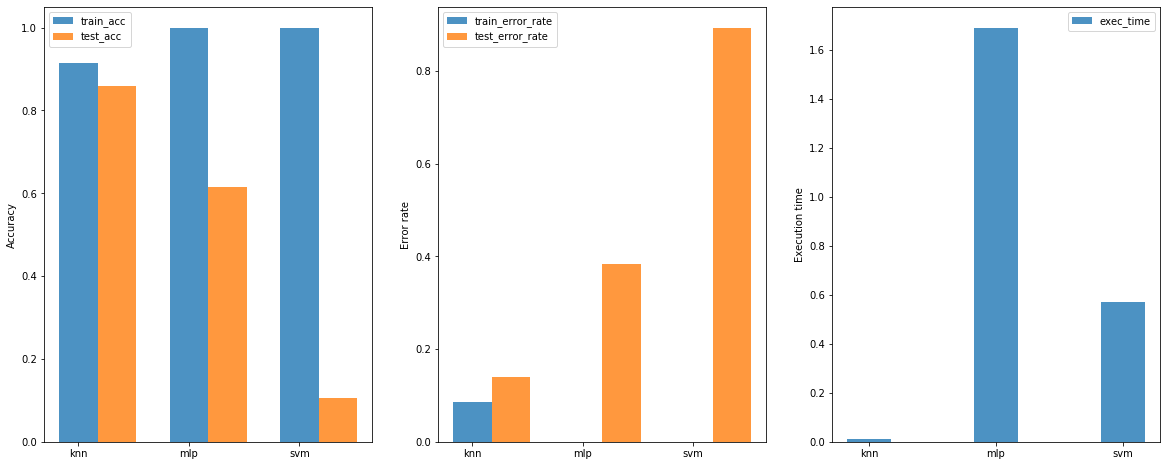

In [23]:
methods = ('knn', 'mlp', 'svm')
y_pos = np.arange(len(methods))
bar_width = 0.35
opacity = 0.8

plt.figure(figsize=(20,8))

plt.subplot(131)
plt.bar(y_pos,train_scores,bar_width,align='center',alpha=opacity,label='train_acc')
plt.bar(y_pos+bar_width,test_scores,bar_width,align='center',alpha=opacity,label='test_acc')
plt.xticks(y_pos,methods)
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(132)
plt.bar(y_pos,train_losses,bar_width,align='center',alpha=opacity,label='train_error_rate')
plt.bar(y_pos+bar_width,test_losses,bar_width,align='center',alpha=opacity,label='test_error_rate')
plt.xticks(y_pos,methods)
plt.ylabel('Error rate')
plt.legend()

plt.subplot(133)
plt.bar(y_pos,training_times,bar_width,align='center',alpha=opacity,label='exec_time')
plt.xticks(y_pos,methods)
plt.ylabel('Execution time')
plt.legend()

plt.show()